In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject="Hunmin")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Hunmin/Baseline_results_train_with_{K}data_H.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/55 - Session Exp_2025-05-27/E8331D05289A/
(8539, 4, 14, 1) (8539,) (86, 4, 14, 1) (86,)
Dataset 2/55 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 89.78%
Maximum validation accuracy : 94.19%
Accuracy of test dataset using model V0: 91.8605%
Dataset 3/55 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.3535%
Dataset 4/55 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.8818%
Dataset 5/55 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.7942%
Dataset 6/55 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Accuracy on unseen dataset: 70.8609%
Dataset 7/55 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Accuracy on unseen dataset: 74.5634%
Dataset 8/55 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.7070%
Dataset 9/55 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Accuracy on unseen dataset: 72.2106%
Dataset 10/55

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '6', '10', '14', '18', '22', '26', '30', '34', '38', '42', '46']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Hunmin/Baseline_results_train_with_{K}data_H.csv')

SUBJECT = "Hunmin"


Dataset 1/55 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.31%
Maximum validation accuracy : 93.23%

Dataset 2/55 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.66%
Maximum validation accuracy : 88.03%

Dataset 3/55 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.08%
Maximum validation accuracy : 93.13%

Dataset 4/55 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.95%
Maximum validation accuracy : 90.81%

Dataset 5/55 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.63%
Maximum validation accu

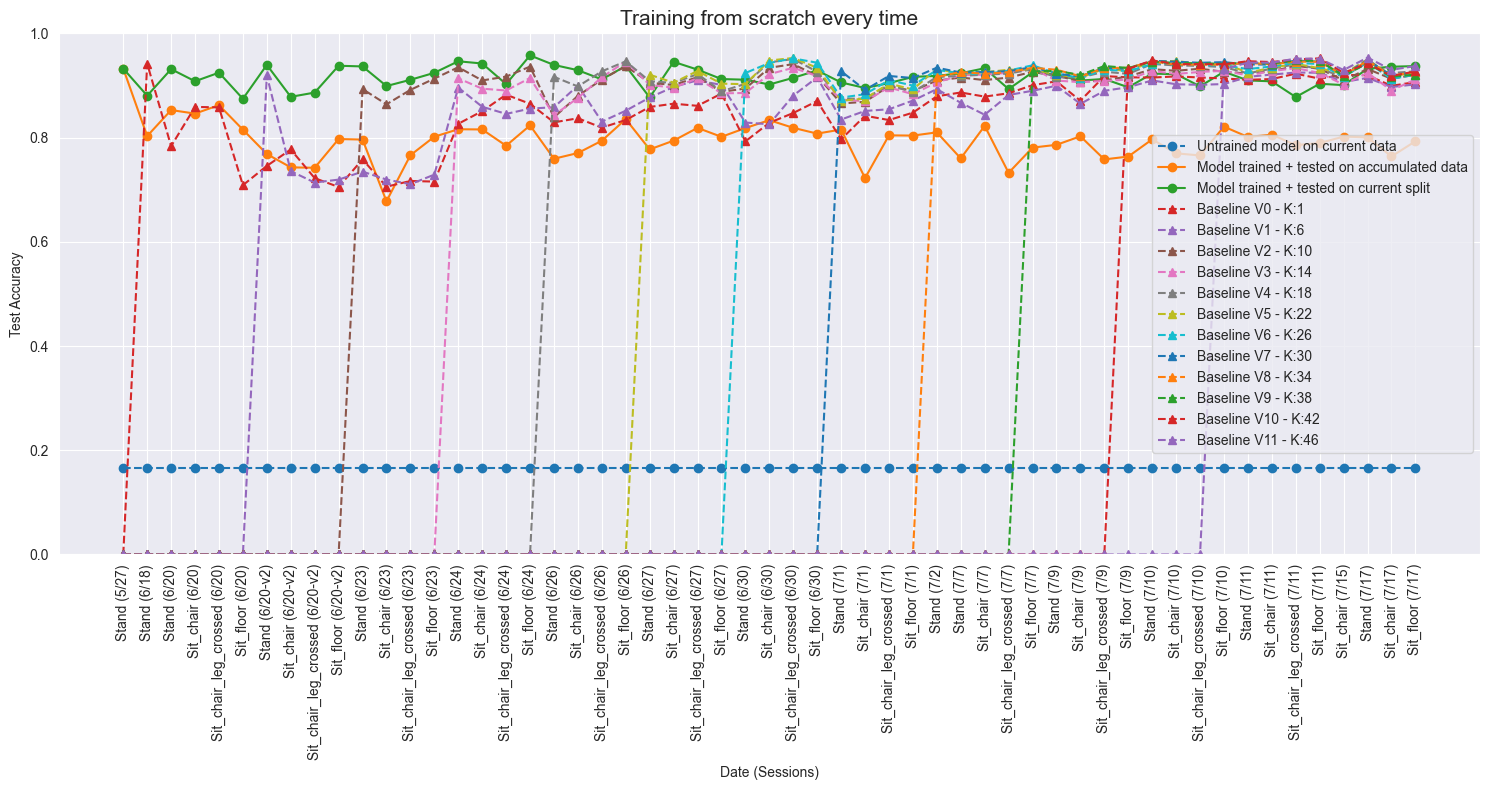

Average of acc without training anything (should be random): 18.13%
Average of acc using previous test data after training: 79.50%
Average of acc using current test data after training: 91.59%
K-1: 84.95% | Target: 91.56
K-6: 86.06% | Target: 91.69
K-10: 91.08% | Target: 91.74
K-14: 90.84% | Target: 91.74
K-18: 92.04% | Target: 91.53
K-22: 92.41% | Target: 91.36
K-26: 92.68% | Target: 91.32
K-30: 93.09% | Target: 91.31
K-34: 93.29% | Target: 91.45
K-38: 93.52% | Target: 91.39
K-42: 93.90% | Target: 91.30
K-46: 94.13% | Target: 91.45


In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")